In [96]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from tqdm import tqdm

In [97]:
neg = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/tests/HC13_5000_test_negative7.zarr')
neg = neg.compute()

In [98]:
pos = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/tests/HC13_5000_test_positive7.zarr')
pos = pos.compute()

In [99]:
nodiif = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/tests/HC13_5000_65_noKz2.zarr')
nodiff = nodiif.compute()

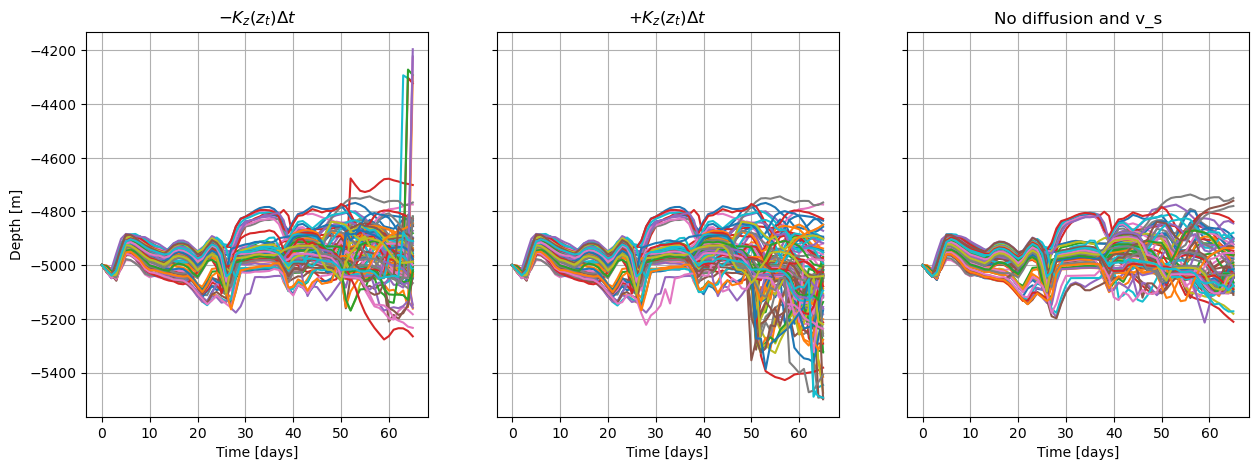

In [100]:
# make a plot with three subplots in one figure with shared yaxis
fig, axes = plt.subplots(ncols=3, nrows=1, sharey=True, figsize=(15, 5))

for i in range(100):
    axes[0].plot(-neg['z'][i,:])
    axes[1].plot(-pos['z'][i,:])
    axes[2].plot(-nodiff['z'][i,:])
    
axes[0].set_title(r'$-K_z(z_t) \Delta t$')
axes[1].set_title(r'$+K_z(z_t) \Delta t$')
axes[2].set_title('No diffusion and v_s')

axes[0].set_ylabel('Depth [m]')
axes[0].set_xlabel('Time [days]')
axes[1].set_xlabel('Time [days]')
axes[2].set_xlabel('Time [days]')

axes[0].grid()
axes[1].grid()  
axes[2].grid()

Text(0, 0.5, 'Vertical diffusive mean displacement [m]')

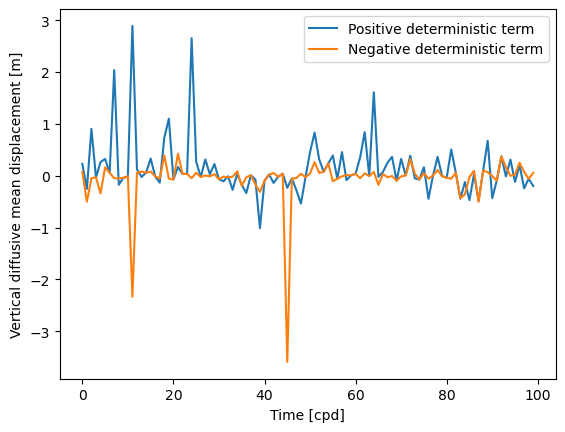

In [103]:
pos['z_kz'].mean(dim='obs').plot(label='Positive deterministic term')
neg['z_kz'].mean(dim='obs').plot(label='Negative deterministic term')
plt.legend()
plt.xlabel('Time [cpd]')
plt.ylabel('Vertical diffusive mean displacement [m]')

Text(0, 0.5, 'Vertical advective mean displacement [m]')

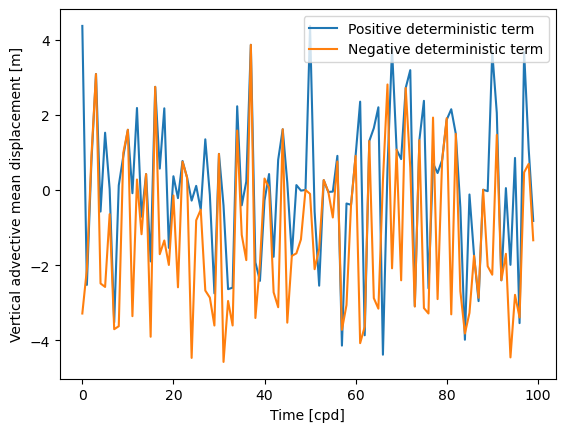

In [104]:
dt = 3600*24
(pos['w']*dt).mean(dim='obs').plot(label='Positive deterministic term')
(neg['w']*dt).mean(dim='obs').plot(label='Negative deterministic term')
plt.legend()
plt.xlabel('Time [cpd]')
plt.ylabel('Vertical advective mean displacement [m]')

Text(0, 0.5, 'Vertical advective mean displacement [m]')

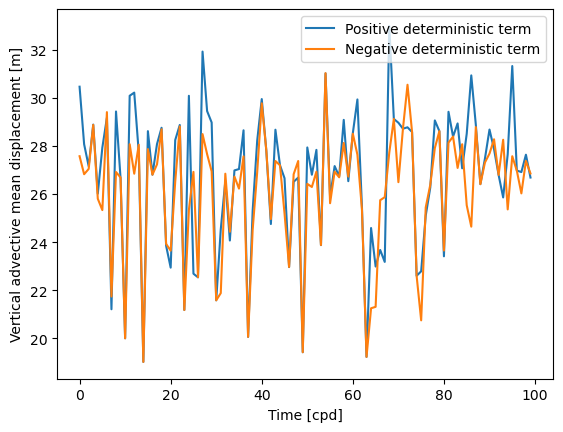

In [125]:
dt = 3600*24
(pos['w']*dt).std(dim='obs').plot(label='Positive deterministic term')
(neg['w']*dt).std(dim='obs').plot(label='Negative deterministic term')
plt.legend()
plt.xlabel('Time [cpd]')
plt.ylabel('Vertical advective mean displacement [m]')

Text(0, 0.5, 'STD depth depth displacement [m]')

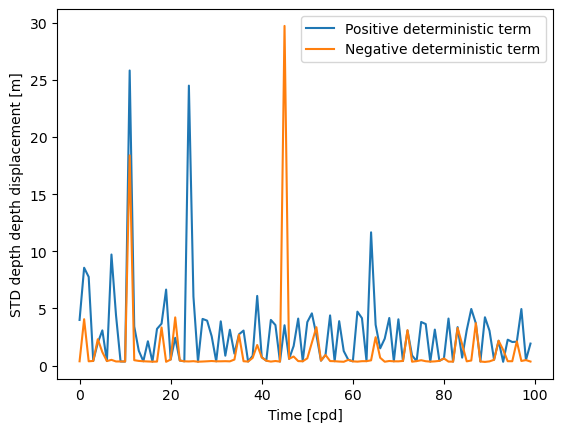

In [105]:
pos['z_kz'].std(dim='obs').plot(label='Positive deterministic term')
neg['z_kz'].std(dim='obs').plot(label='Negative deterministic term')

plt.legend()
plt.xlabel('Time [cpd]')
plt.ylabel('STD depth depth displacement [m]')

[]

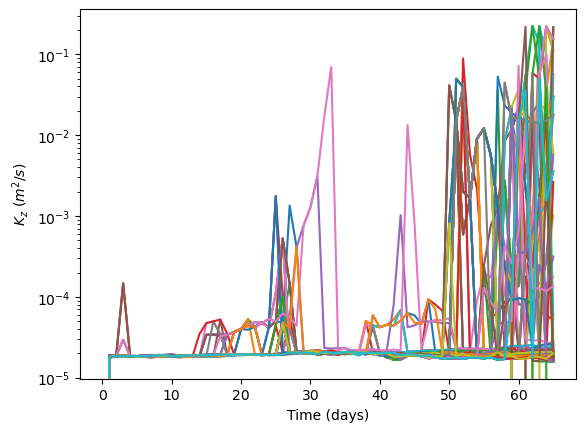

In [106]:
for i in range(100):
    # plt.plot(neg['z_kz'][i,:])
    plt.plot(pos['kz'][i,:])
    
plt.xlabel('Time (days)')
plt.ylabel('$K_z$ ($m^2/s$)')

plt.semilogy()


In [107]:
nodiff['floored'][:,65].sum()

<xarray.DataArray 'floored' ()>
array(1., dtype=float32)
Coordinates:
    obs      int32 65

In [108]:
neg['floored'][:,65].sum()

<xarray.DataArray 'floored' ()>
array(4., dtype=float32)
Coordinates:
    obs      int32 65

In [109]:
pos['floored'][:,65].sum()

<xarray.DataArray 'floored' ()>
array(52., dtype=float32)
Coordinates:
    obs      int32 65

Text(0, 0.5, 'Depth (m)')

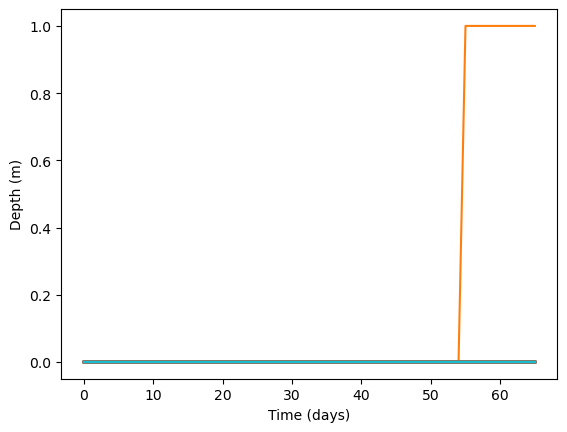

In [110]:
for i in range(100):
    # plt.plot(neg['z_kz'][i,:])
    plt.plot(nodiff['floored'][i,:])
    
plt.xlabel('Time (days)')
plt.ylabel('Depth (m)')


Text(0, 0.5, 'Latitude')

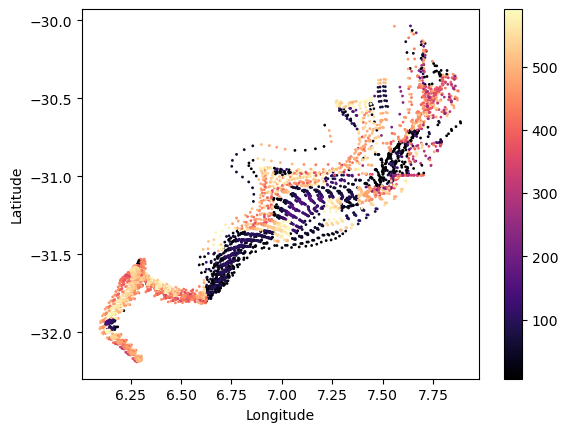

In [111]:
for i in range(100):
    # plt.plot(neg['z_kz'][i,:])
    im = plt.scatter(pos['lon'][i,:], pos['lat'][i,:], 
                     c=pos['bottom'][i,:] - pos['z'][i,:], cmap='magma',
                     s=1)
    
plt.colorbar(im)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

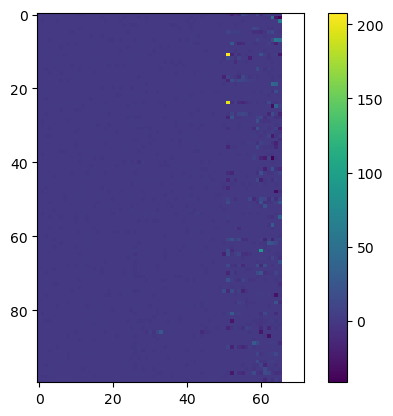

In [112]:
plt.imshow(pos['z_kz'])
plt.colorbar()

Text(0.5, 1.0, 'Vertical displacement in one $\\Delta t$')

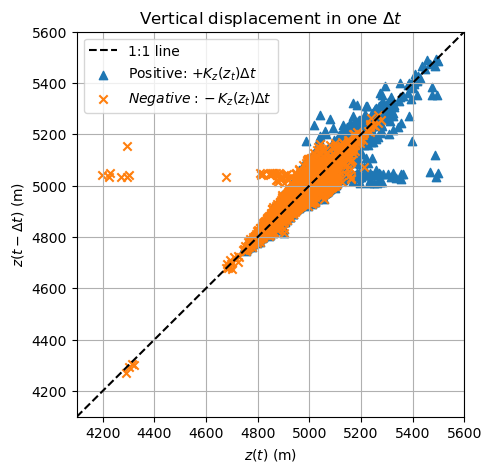

In [113]:
z_1_pos = np.roll(pos['z'], 1, axis=1)
z_1_neg = np.roll(neg['z'], 1, axis=1)

x = np.linspace(4100, 5600, 100)

plt.figure(figsize=(5,5))
plt.scatter(pos['z'][:,:], z_1_pos[:,:], marker='^', 
            label=r'Positive: $+K_z(z_t) \Delta t$')
plt.scatter(neg['z'][:,:], z_1_neg[:,:], marker='x', 
            label=r'$Negative: -K_z(z_t) \Delta t$')
plt.plot(x, x, 'k--', label='1:1 line')
plt.legend()
plt.xlabel(r'$z(t)$ (m)')
plt.ylabel(r'$z(t-\Delta t)$ (m)')
plt.xlim(4100, 5600)
plt.ylim(4100, 5600)
plt.grid()
plt.title('Vertical displacement in one $\Delta t$')


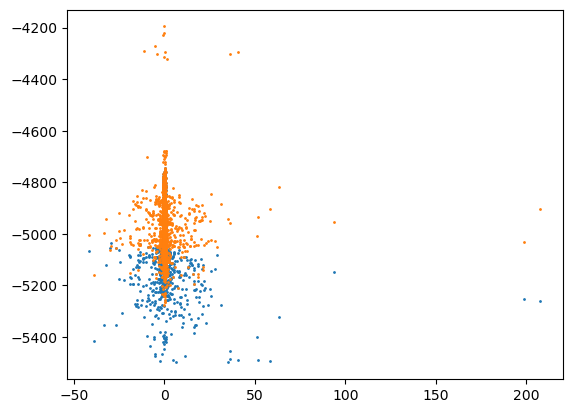

In [114]:
plt.scatter(pos['z_kz'], -pos['z'] , s=1)
plt.scatter(pos['z_kz'], -neg['z'], s=1)
# plt.semilogx()

Text(0.5, 1.0, 'distance to seafloor')

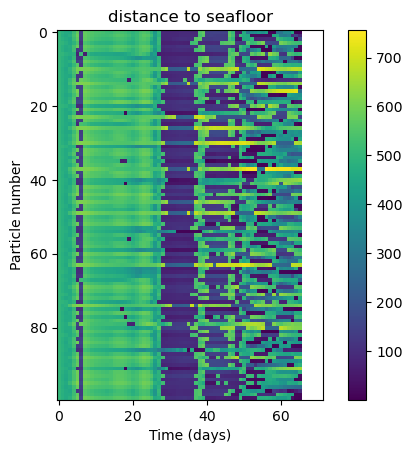

In [115]:
plt.imshow(pos['bottom'] - pos['z'])
plt.colorbar()
plt.xlabel('Time (days)')
plt.ylabel('Particle number')
plt.title('distance to seafloor')

Text(0.5, 1.0, 'Difference between bottom depth and particle depth')

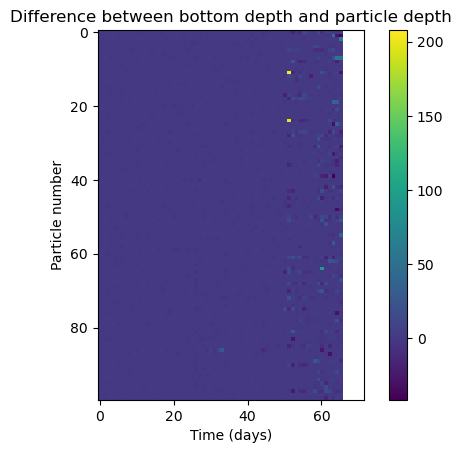

In [126]:
plt.imshow(pos['z_kz'])
plt.colorbar()
plt.xlabel('Time (days)')
plt.ylabel('Particle number')
plt.title('Difference between bottom depth and particle depth')

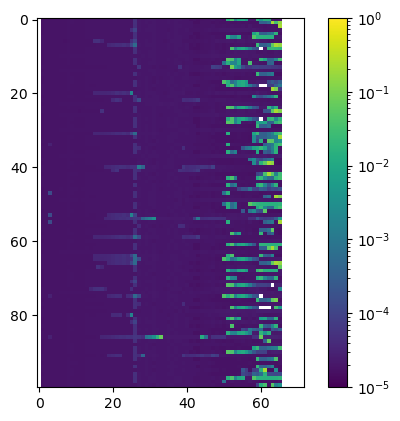

In [117]:
from matplotlib.colors import LogNorm 
plt.imshow(pos['kz'], norm=LogNorm(vmin=1e-5, vmax=1e0))
plt.colorbar()

In [118]:
max_z_index = np.zeros_like(pos.obs.values)

for j in pos.obs.values:
    max_z_index[j] = np.argmax(pos['z_kz'][:, j].values, axis=0)

In [119]:
max_z_index[60:]

array([64, 52, 62,  1,  7,  2,  0,  0,  0,  0,  0,  0], dtype=int32)

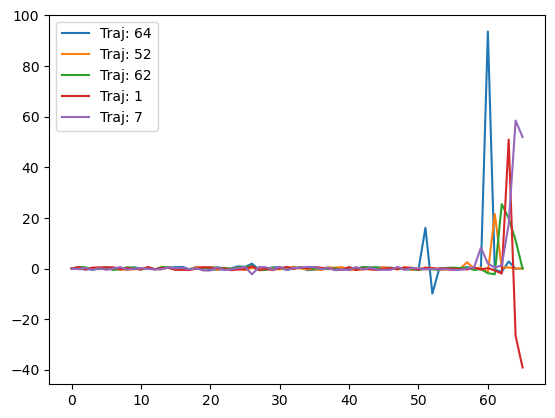

In [120]:
for traj in max_z_index[60:65]:
    plt.plot(pos['z_kz'][traj, :].values, label= 'Traj: ' + str(traj))
    
plt.legend()  

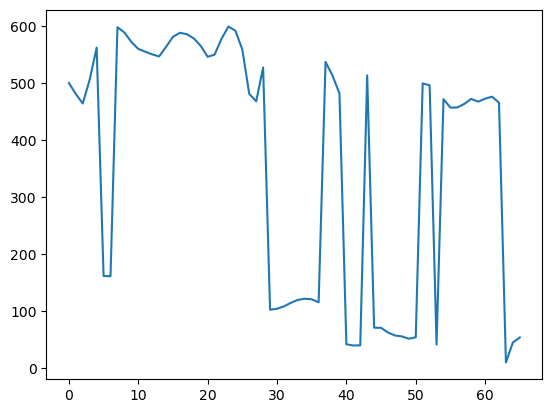

In [121]:
plt.plot(pos['bottom'][19, :] - pos['z'][19, :])

[]

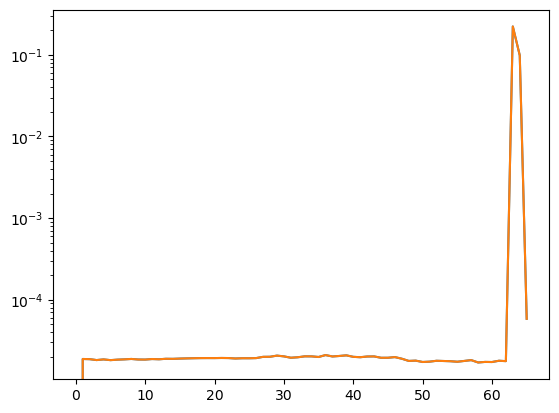

In [122]:
plt.plot(pos['kz'][19, :])
plt.plot(pos['kzdz'][19, :])

plt.semilogy()

Text(0.5, 1.0, 'Negative sign in deterministic term diffusion')

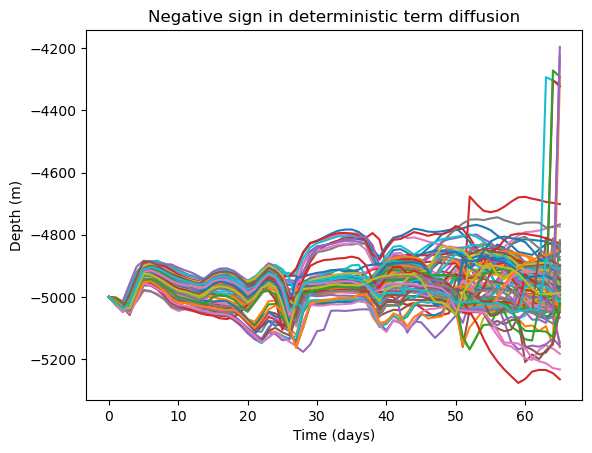

In [123]:
for i in range(100):
    plt.plot(-neg['z'][i,:])
    
plt.xlabel('Time (days)')
plt.ylabel('Depth (m)')
plt.title('Negative sign in deterministic term diffusion')

Text(0.5, 1.0, 'Negative sign in deterministic term diffusion')

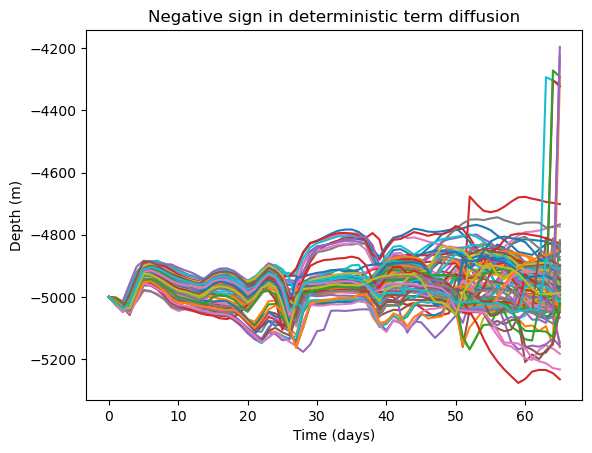

In [124]:
for i in range(100):
    plt.plot(-neg['z'][i,:])
    
plt.xlabel('Time (days)')
plt.ylabel('Depth (m)')
plt.title('Negative sign in deterministic term diffusion')